<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW #3: ARIMAX, Compositions

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Дополнительный материал для выполнения дз**:
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11
- Лукашин Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

<span style="color:red; font-size: 14pt;"> DEADLINE: 10 October 2017 23:59:59 </span>

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 


<h1 align="center">Check Questions (20%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1** Опишите ситуацию (аргументированно), в котором композиция Adaptive Selection будет прогнозировать хуже, чем лучший из базовых алгоритмов.

**Ответ:** В том случае, когда лучший из базовых алгоритмов выдает прогноз, который находится между правильным ответом и прогнозами всех остальных алгоритмов.

**Вопрос 2**  Опишите ситуацию (аргументированно), в котором композиция Adaptive Composition будет прогнозировать хуже, чем лучший из базовых алгоритмов.

**Ответ:** В том же случае.

**Вопрос 3** Что значит смешиваемость (mixability) игры (в теории агрегирующего алгоритма)?

**Ответ сложный и непонятный**

**Вопрос 4**: Верно ли, что для смешиваемых игр процесс потерь любой композиции (любого алгоритма) будет расти со временем (с ростом $t$) не быстрее, чем процесс потерь лучшего из базовых алгоритмов? Если нет - приведит пример, когда это не так.

### $$ \mathrm{Loss}_{Composition}(T)\leq \inf\limits_{BA} \mathrm{Loss}_{BA}(T)+C$$

**Хочу вопросы, в поисках ответов на которые можно узнать что-то новое, а не потратить впустую пару часов**

<h1 align="center">2. Contest: electricity comsumption contest (80%)</h1>
Take part in <a href='https://www.kaggle.com/t/de102b28cae74e6ead7492ff12efbc63'>contest</a>.
<span style='color:red'> You need to send the final code that is used for building forecast.</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline


from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.linear_model import LinearRegression

Using TensorFlow backend.


In [157]:

with open('./train.csv', 'r') as iofile:
    tsIN = pd.read_csv(iofile, sep=',', index_col=0)
    
final_forecast = pd.read_csv(open("SubmissionSample.csv", 'r'), sep=',', index_col=0)
    
tsIN.drop('Date', axis=1, inplace=True)

tsIN = tsIN[["tsID", "ACTUAL"]]


In [163]:
def diff(a, h):
    a = a.copy()
    b = np.array(a[:-h])
    a[h:] = a[h:] - b
    return a

def undiff(a, h):
    a = a.copy()
    for i in range(h, len(a)):
        a[i:i + 1] = a[i:i + 1] + np.array(a[i - h:i - h + 1])
    return a
    

In [169]:
series = []
for i in set(tsIN["tsID"]):
    fr = pd.DataFrame(tsIN[tsIN["tsID"] == i]).copy()
    series.append(fr)
    fr.drop('tsID', axis=1, inplace=True)
    assert(fr.index.max() - fr.index.min() + 1 == len(fr))
    plt.show()

In [170]:
tv = None
def serie_calc(s, label=""):
    s = s[["ACTUAL"]]
    train = s[:-30]
    test = s[-30:]
    train['ACTUAL'] = diff(diff(train['ACTUAL'], 364), 7)
    forecast = train[-364:].values.mean()
    test['ACTUAL'] = np.ones(30) * forecast
    s = pd.concat([train, test])
    s['ACTUAL'] = undiff(undiff(s['ACTUAL'], 7), 364)
    
    plt.plot(s["ACTUAL"][-30:].index, s["ACTUAL"][-30:].values)
    plt.plot(s["ACTUAL"][:-30].index, s["ACTUAL"][:-30].values) 
    plt.xlim((s.index[int(len(s) * 0.6)], None))
    plt.title(label + " ORIGINAL")
    plt.show()
    return s[-30:].copy()


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


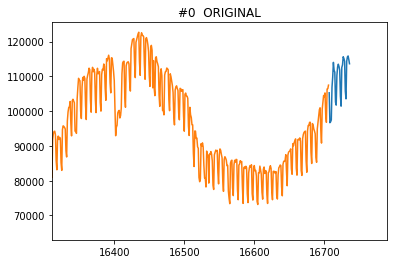

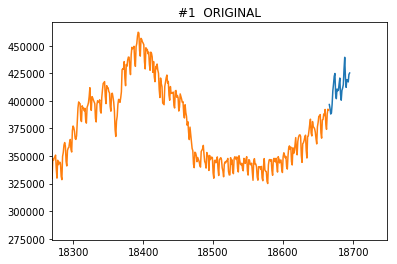

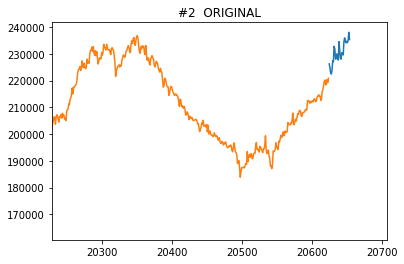

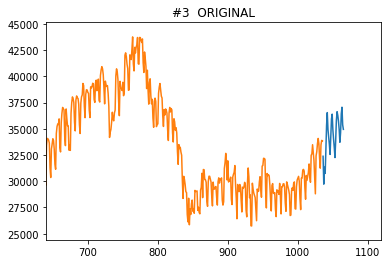

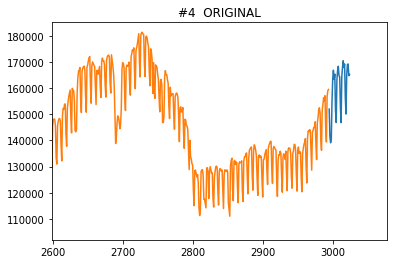

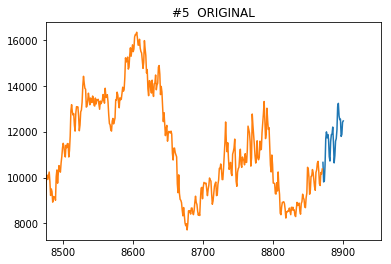

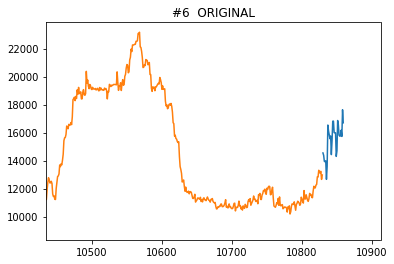

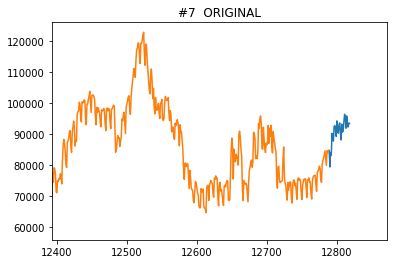

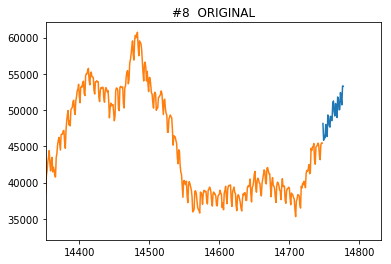

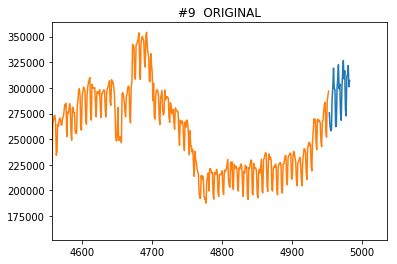

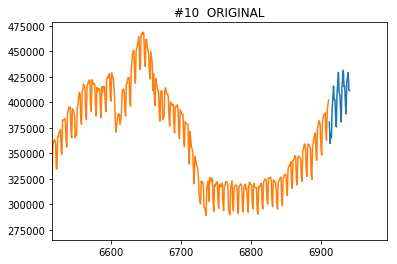

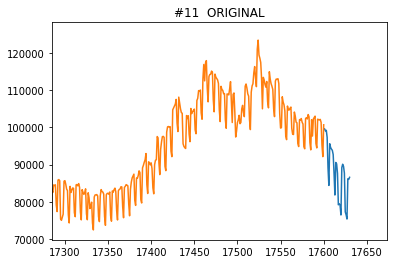

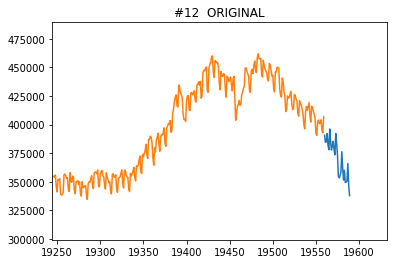

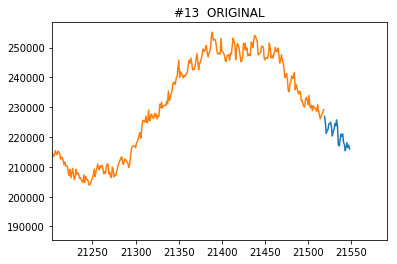

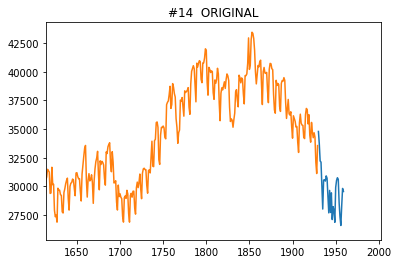

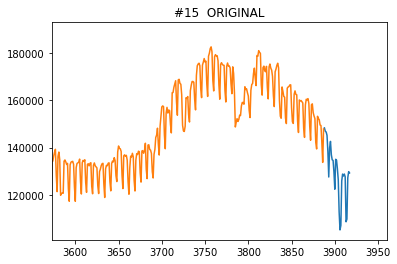

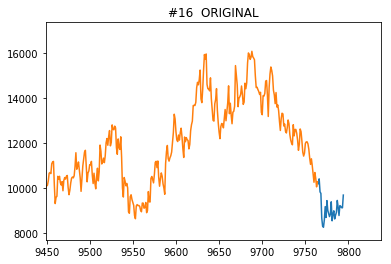

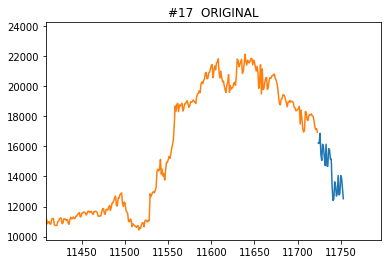

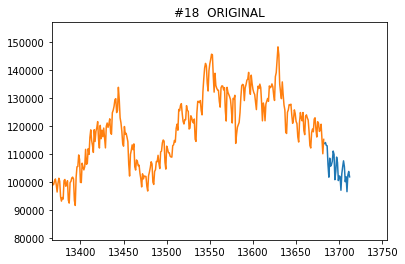

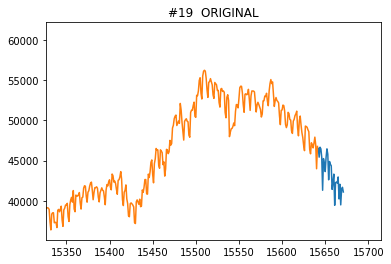

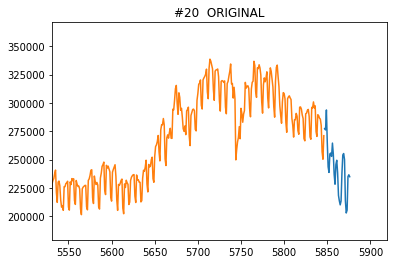

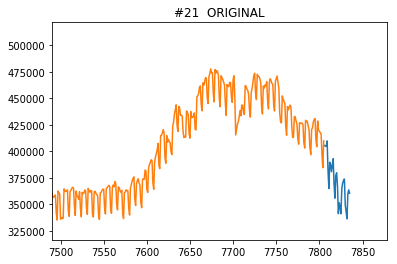

In [171]:
for i, s in list(enumerate(series))[:]:
    try:
        ans = serie_calc(s, label='#' + str(i) + " ").dropna()
        for j in ans.index:
            final_forecast.loc[j, "PREDICTED"] = ans.loc[j, "ACTUAL"]
    except:
        print("FAILED " + str(i))
        raise
        pass

In [103]:
len(final_forecast.dropna())

660

In [67]:
len(final_forecast)

660

In [63]:
# save forecast to disk for further submission
final_forecast.to_csv('result.csv')